In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

## Finding the table names

In [2]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


I briefly ran into trouble here because I had capitalized the T in the word "table" in the WHERE clause. This shocked me because the other pieces of SQL have not been case sensitive - for example, I will execute the next query with mixed case "select" and "from":

In [3]:
q2 = "seLeCt * From facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


The same also happens if I used mixed case on the table name:

In [4]:
q2point2 = "selECT * fROM FaCTs lImIt 5;"
pd.read_sql_query(q2point2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Exploring the results:
Next I will write a single query that returns the minimums and maximums of population and population growth:

In [5]:
q3 = """
SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth)
FROM facts
"""
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


A minimum population of zero? I bet property's cheap there! Let's see what countries have the minimum population:

In [6]:
q3point2 = """
SELECT name, population
FROM facts
WHERE population = 
    (SELECT MIN(population) 
    FROM facts)
"""
pd.read_sql_query(q3point2, conn)

,name,population
0,Antarctica,0


Oh, I guess it's a bit cold there, I'm more a fan of warmth. Let's see what the lowest population is where population is greater than zero:

In [7]:
q3point3 = """
SELECT name, population
FROM facts
WHERE population = 
    (SELECT MIN(population) 
    FROM facts
    WHERE population > 0)
"""
pd.read_sql_query(q3point3, conn)

,name,population
0,Pitcairn Islands,48


Pitcairn Islands. Holy crud, they have [Google Street View](https://www.google.com/maps/place/Pitcairn+Islands/@-25.0651911,-130.1012267,3a,75y,340h,90t/data=!3m7!1e1!3m5!1s1tBNFaAW8j82fT-bdEIfyQ!2e0!6s%2F%2Fgeo1.ggpht.com%2Fcbk%3Fpanoid%3D1tBNFaAW8j82fT-bdEIfyQ%26output%3Dthumbnail%26cb_client%3Dmaps_sv.tactile.gps%26thumb%3D2%26w%3D203%26h%3D100%26yaw%3D340%26pitch%3D0%26thumbfov%3D100!7i13312!8i6656!4m5!3m4!1s0x9e380f7fdca8078b:0x469c8cc719159ac8!8m2!3d-24.3767537!4d-128.3242376) and literally 48 people live there.

Impressive. 

But what's up with that max population? 7,256,490,011 people? What is that, the world?

In [8]:
q4 = """
SELECT name, population
FROM facts
WHERE population = 
    (SELECT MAX(population) 
    FROM facts)
"""
pd.read_sql_query(q4, conn)

,name,population
0,World,7256490011


Yup. Let's see the next ten highest population countries:

In [9]:
q4point2 = """
SELECT name, population
FROM facts
WHERE population != 
    (SELECT MAX(population) 
    FROM facts)
ORDER BY population DESC
LIMIT 10
"""
pd.read_sql_query(q4point2, conn)

,name,population
0,China,1367485388
1,India,1251695584
2,European Union,513949445
3,United States,321368864
4,Indonesia,255993674
5,Brazil,204259812
6,Pakistan,199085847
7,Nigeria,181562056
8,Bangladesh,168957745
9,Russia,142423773


Well the European Union isn't a country, either. Let's remove that, and select all columns.

In [10]:
q4point3 = """
SELECT *
FROM facts
WHERE population != 
    (SELECT MAX(population) 
    FROM facts)
    AND name NOT IN ('European Union')
ORDER BY population DESC
LIMIT 10
"""
pd.read_sql_query(q4point3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44
1,77,in,India,3287263,2973193,314070,1251695584,1.22,19.55,7.32,0.04
2,186,us,United States,9826675,9161966,664709,321368864,0.78,12.49,8.15,3.86
3,78,id,Indonesia,1904569,1811569,93000,255993674,0.92,16.72,6.37,1.16
4,24,br,Brazil,8515770,8358140,157630,204259812,0.77,14.46,6.58,0.14
5,132,pk,Pakistan,796095,770875,25220,199085847,1.46,22.58,6.49,1.54
6,129,ni,Nigeria,923768,910768,13000,181562056,2.45,37.64,12.90,0.22
7,14,bg,Bangladesh,148460,130170,18290,168957745,1.60,21.14,5.61,0.46
8,143,rs,Russia,17098242,16377742,720500,142423773,0.04,11.60,13.69,1.69
9,85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.00


## Histograms
Okay, let's remove the World, EU, and Antarctica from our results and plot a histogram of a few features. First, we'll import the tools:

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

And create the query for the four features we want to plot:

In [12]:
q5 = """
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != 
    (SELECT MAX(population) 
    FROM facts)
    AND name NOT IN ('European Union')
    AND population != 
        (SELECT MIN(population) 
        FROM facts)
"""

Now we can add .hist() to the read_sql_query() call and it will plot:

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a1ad1eac8>,
      dtype=object)

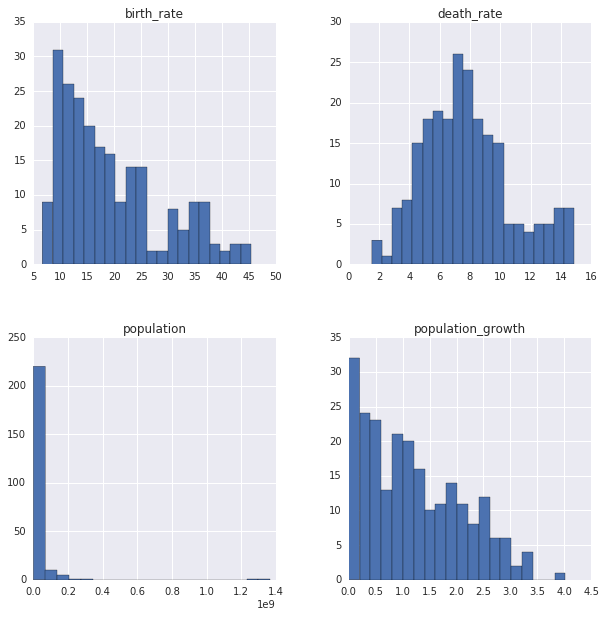

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

pd.read_sql_query(q5, conn).hist(ax=ax, bins=20)

Let's explore some extra steps:
* Which countries have the highest population density?
* Generate a histogram of population densities.
* Which countries have the highest ratios of water to land? Which countries have more water than land?

## Highest population density
Some of the results in the database have NaNs for area_land or population, so I'll remove those to remove NaNs from the population density calculation.

In [14]:
q6 = """
SELECT name, population, area_land, population/cast(area_land as Float) as population_density
FROM facts
WHERE population IS NOT NULL AND area_land IS NOT NULL
ORDER BY population_density DESC
"""
pd.read_sql_query(q6, conn)

,name,population,area_land,population_density
0,Macau,592731,28,21168.964286
1,Monaco,30535,2,15267.500000
2,Singapore,5674472,687,8259.784571
3,Hong Kong,7141106,1073,6655.271202
4,Gaza Strip,1869055,360,5191.819444
5,Gibraltar,29258,6,4876.333333
6,Bahrain,1346613,760,1771.859211
7,Maldives,393253,298,1319.640940
8,Malta,413965,316,1310.015823
9,Bermuda,70196,54,1299.925926


Interestingly the Vatican City shows up last here because the calculation returns NaN. That's because the source data has area_land as 0 instead of 0.17. It's 6th on the Wikipedia list, 3rd officially (dependent terrritories excluded). The rest of the data is also slightly different, although most of the results are similar, because the data on wikipedia is taken from a different source.

### Histogram of pop density

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a18a5c358>],
      dtype=object)

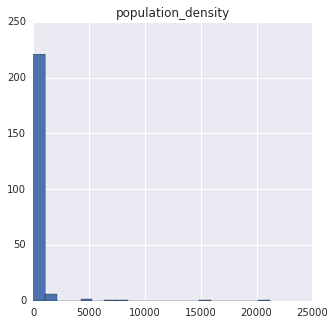

In [15]:
q6point2 = """
SELECT population/cast(area_land as Float) as population_density
FROM facts
WHERE population IS NOT NULL AND area_land IS NOT NULL
ORDER BY population_density DESC
"""
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

pd.read_sql_query(q6point2, conn).hist(ax=ax, bins=20)

## Top water-to-land ratios

In [16]:
q7 = """
SELECT name, area_land, area_water, area, area_water/cast(area as Float) as water_to_land
FROM facts
WHERE area_water IS NOT NULL AND area IS NOT NULL
ORDER BY water_to_land DESC
LIMIT 10
"""
pd.read_sql_query(q7, conn)

,name,area_land,area_water,area,water_to_land
0,British Indian Ocean Territory,60,54340,54400,0.998897
1,Virgin Islands,346,1564,1910,0.818848
2,Puerto Rico,8870,4921,13791,0.356827
3,"Bahamas, The",10010,3870,13880,0.278818
4,Guinea-Bissau,28120,8005,36125,0.221592
5,Malawi,94080,24404,118484,0.205969
6,Netherlands,33893,7650,41543,0.184147
7,Uganda,197100,43938,241038,0.182287
8,Eritrea,101000,16600,117600,0.141156
9,Liberia,96320,15049,111369,0.135127


In [17]:
q7point2 = """
SELECT name, area_land, area_water, area, area_water/cast(area as Float) as water_to_land
FROM facts
WHERE area_water IS NOT NULL AND area IS NOT NULL AND area_water > area_land
ORDER BY water_to_land DESC
"""
pd.read_sql_query(q7point2, conn)

,name,area_land,area_water,area,water_to_land
0,British Indian Ocean Territory,60,54340,54400,0.998897
1,Virgin Islands,346,1564,1910,0.818848


## Extra Credit: Group Bys
Let's look at population by first letter of country name. 

In [18]:
q8 = """
SELECT SUBSTR(name, 1, 1) AS name_first_letter, SUM(population)
FROM facts
GROUP BY name_first_letter
"""
pd.read_sql_query(q8, conn)

,name_first_letter,SUM(population)
0,A,182823390
1,B,518195981
2,C,1664414602
3,D,16977890
4,E,732446258
5,F,73276337
6,G,158017129
7,H,35896181
8,I,1701785899
9,J,138084727


And now let's look at name_first_letters with populations above the average for name_first_letter:

In [43]:
q9 = """
SELECT SUBSTR(name, 1, 1) AS name_first_letter, SUM(population) as total_pop
FROM facts
GROUP BY name_first_letter
HAVING total_pop >  AVG(
    (SELECT SUM(population)
    FROM facts
    GROUP BY SUBSTR(name, 1, 1)))
"""
pd.read_sql_query(q9, conn)

,name_first_letter,total_pop
0,B,518195981
1,C,1664414602
2,E,732446258
3,I,1701785899
4,M,285441887
5,N,266210163
6,P,400649115
7,S,289086014
8,T,256487071
9,U,505309897


In [52]:
q9point2 = """
SELECT SUBSTR(name, 1, 1) as name_first_letter, SUM(population) as total_pop, SUM(area) as total_area, SUM(area_land) as total_land
FROM facts
GROUP BY name_first_letter
HAVING total_pop >  AVG(
    (SELECT SUM(population)
    FROM facts
    GROUP BY SUBSTR(name, 1, 1)))
"""
pd.read_sql_query(q9point2, conn)

,name_first_letter,total_pop,total_area,total_land
0,B,518195981,11972824,11672784
1,C,1664414602,26079464,25971101
2,E,732446258,6926013,1464451
3,I,1701785899,7774299,7237899
4,M,285441887,8157730,8060783
5,N,266210163,2678027,3889045
6,P,400649115,3745402,3678651
7,S,289086014,8458171,5872788
8,T,256487071,3154292,3041472
9,U,505309897,11622088,10864341


In [53]:
q9point2 = """
SELECT SUBSTR(name, 1, 1) as name_first_letter, SUM(population) as total_pop, SUM(area) as total_area, SUM(area_land) as total_land
FROM facts
GROUP BY name_first_letter
HAVING total_pop >  AVG(
    (SELECT SUM(population)
    FROM facts
    GROUP BY SUBSTR(name, 1, 1)))
    AND (total_area > AVG(
            (SELECT SUM(area)
            FROM facts
            GROUP BY SUBSTR(name, 1, 1)))
        OR
        total_land > AVG(
            (SELECT SUM(area_land)
            FROM facts
            GROUP BY SUBSTR(name,1,1))))
        
"""
pd.read_sql_query(q9point2, conn)

,name_first_letter,total_pop,total_area,total_land
0,C,1664414602,26079464,25971101


We'll double check that worked by breaking the query into two:

In [36]:
q10 = """
SELECT AVG(
    (SELECT SUM(population) FROM facts GROUP BY SUBSTR(name, 1, 1)))
FROM facts
"""
pd.read_sql_query(q10, conn)

,"AVG( (SELECT SUM(population) FROM facts GROUP BY SUBSTR(name, 1, 1)))"
0,182823390.0


In [44]:
q10point2 = """
SELECT SUBSTR(name, 1, 1) AS name_first_letter, SUM(population) as total_pop
FROM facts
GROUP BY name_first_letter
HAVING total_pop >  182823390.0
"""
df1 = pd.read_sql_query(q9, conn)
df2 = pd.read_sql_query(q10point2, conn)
print(df1.equals(df2))

True


Voilá.